### Install/import library

In [720]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler 
from keras.callbacks import ModelCheckpoint 
from tensorflow.keras.models import load_model 

from keras.models import Sequential 
from keras.layers import LSTM 
from keras.layers import Dropout 
from keras.layers import Dense 

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error 



### Import data

In [721]:
fpt_data = pd.read_csv('FPT.csv')
msn_data = pd.read_csv('MSN.csv')
pnj_data = pd.read_csv('PNJ.csv')
vic_data = pd.read_csv('VIC.csv')

### Data processing

In [722]:
fpt_data['Date/Time'] = pd.to_datetime(fpt_data['Date/Time'], format='%m/%d/%Y %H:%M')
msn_data['Date/Time'] = pd.to_datetime(msn_data['Date/Time'], format='%m/%d/%Y %H:%M')
pnj_data['Date/Time'] = pd.to_datetime(pnj_data['Date/Time'], format='%m/%d/%Y %H:%M')
vic_data['Date/Time'] = pd.to_datetime(vic_data['Date/Time'], format='%m/%d/%Y %H:%M')


In [723]:
print(fpt_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97406 entries, 0 to 97405
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Ticker         97406 non-null  object        
 1   Date/Time      97406 non-null  datetime64[ns]
 2   Open           97406 non-null  float64       
 3   High           97406 non-null  float64       
 4   Low            97406 non-null  float64       
 5   Close          97406 non-null  float64       
 6   Volume         97406 non-null  int64         
 7   Open Interest  97406 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 5.9+ MB
None


In [724]:
fpt_data = fpt_data.drop('Open Interest', axis=1)
fpt_data.head()
msn_data = msn_data.drop('Open Interest', axis=1)
msn_data.head()
pnj_data = pnj_data.drop('Open Interest', axis=1)
pnj_data.head()
vic_data = vic_data.drop('Open Interest', axis=1)
vic_data.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume
0,VIC,2018-10-17 09:39:00,98.5,98.5,98.5,98.5,390
1,VIC,2018-10-17 09:40:00,98.5,98.5,98.5,98.5,760
2,VIC,2018-10-17 09:41:00,98.6,98.6,98.6,98.6,2060
3,VIC,2018-10-17 09:42:00,98.6,98.6,98.6,98.6,5540
4,VIC,2018-10-17 09:43:00,98.6,98.7,98.6,98.7,760


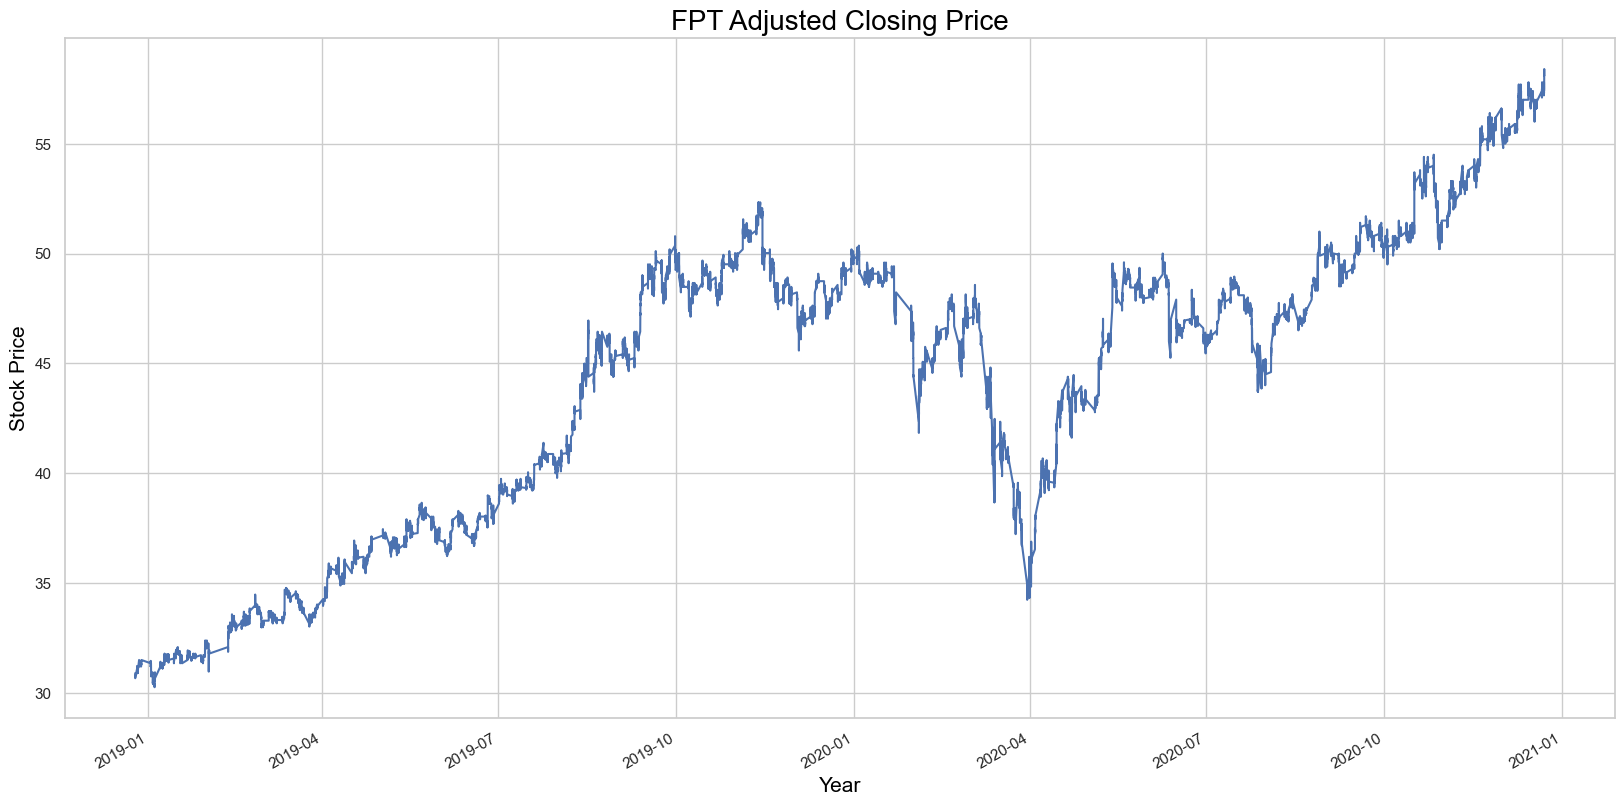

In [725]:
fpt_data = fpt_data.set_index('Date/Time')

fpt_data['Close'].plot(grid=True)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('FPT Adjusted Closing Price', color='black', fontsize=20)
plt.xlabel('Year', color='black', fontsize=15)
plt.ylabel('Stock Price', color='black', fontsize=15)
plt.show()

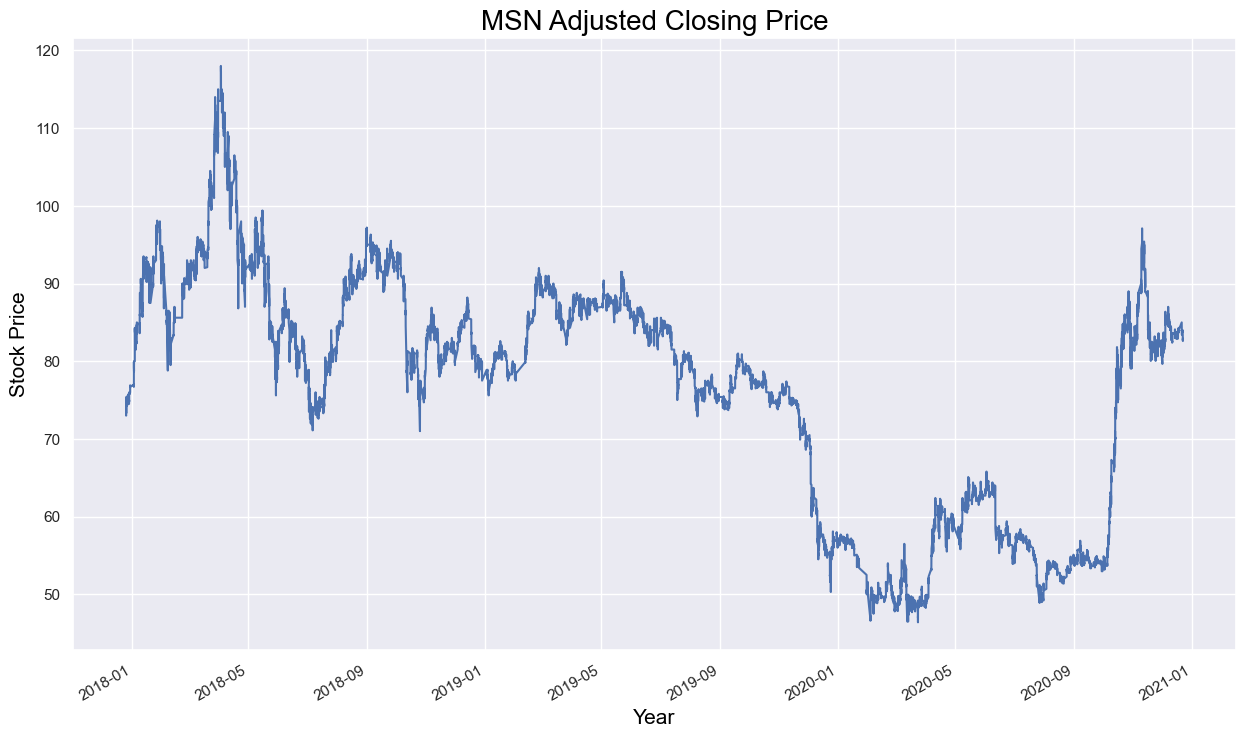

In [726]:
msn_data = msn_data.set_index('Date/Time')

msn_data['Close'].plot(grid=True)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('MSN Adjusted Closing Price', color='black', fontsize=20)
plt.xlabel('Year', color='black', fontsize=15)
plt.ylabel('Stock Price', color='black', fontsize=15)
plt.show()

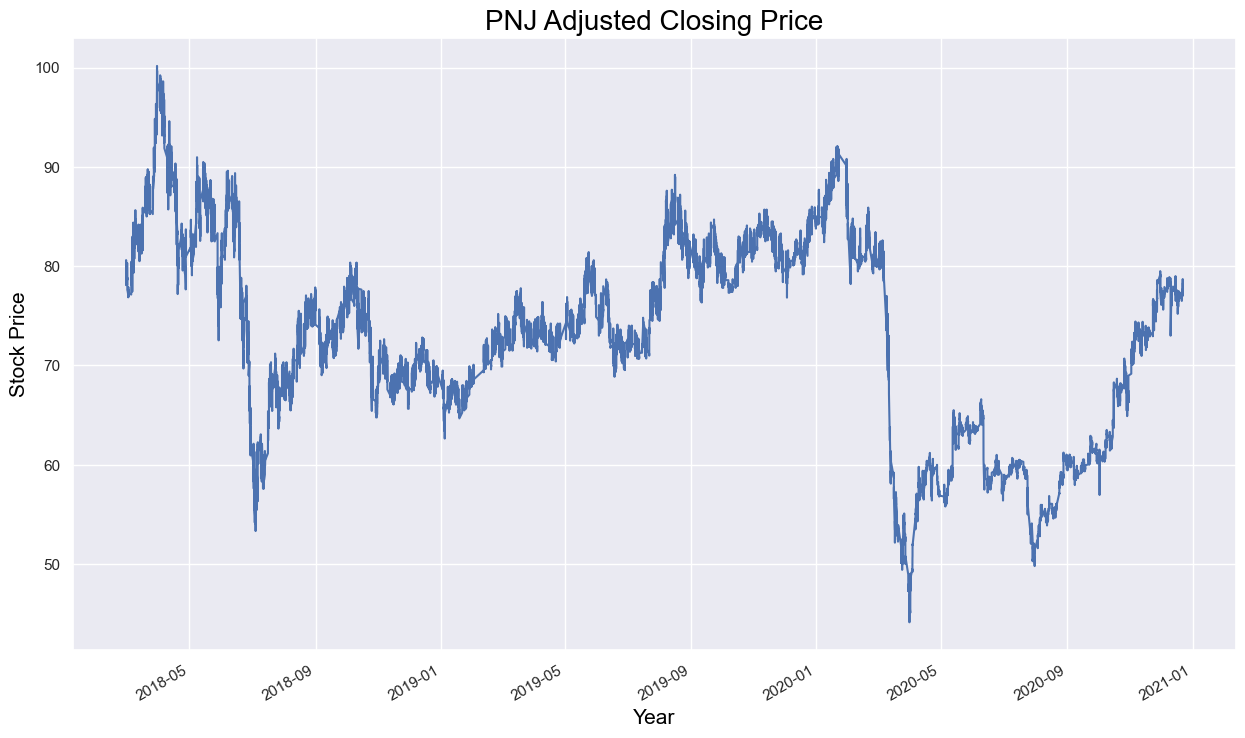

In [727]:
pnj_data = pnj_data.set_index('Date/Time')

pnj_data['Close'].plot(grid=True)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('PNJ Adjusted Closing Price', color='black', fontsize=20)
plt.xlabel('Year', color='black', fontsize=15)
plt.ylabel('Stock Price', color='black', fontsize=15)
plt.show()

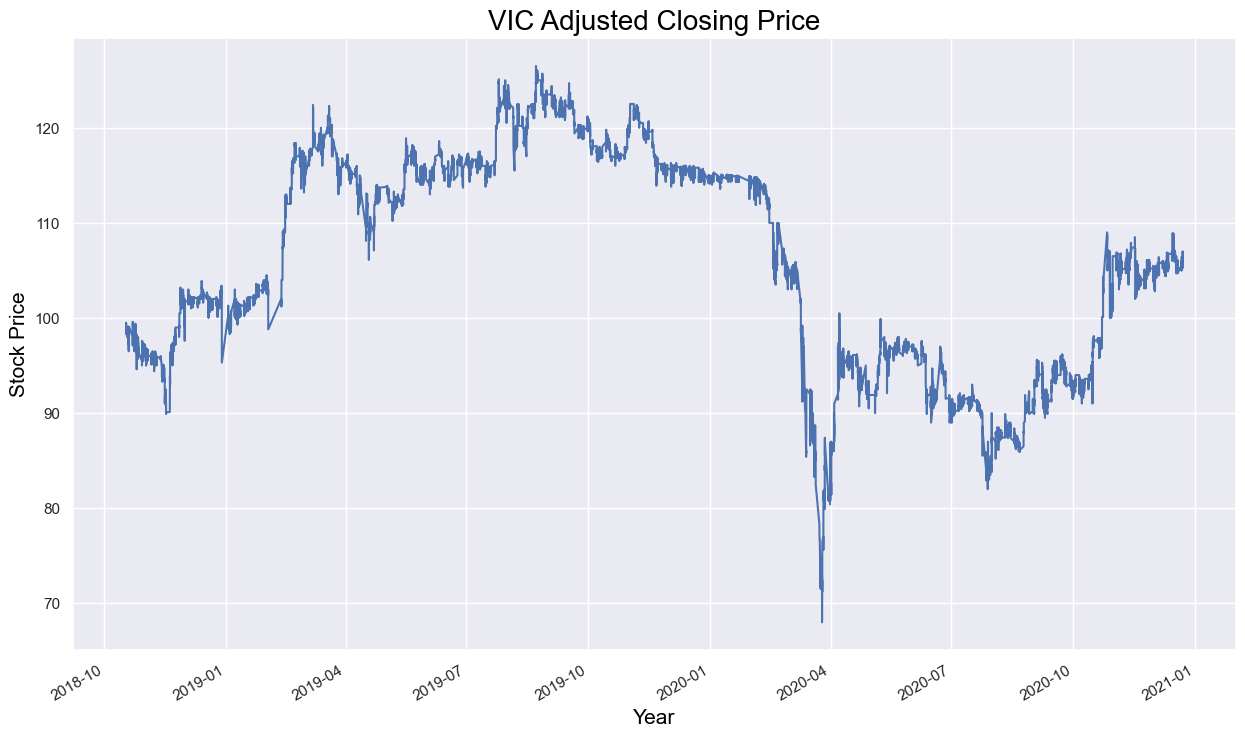

In [728]:
vic_data = vic_data.set_index('Date/Time')

vic_data['Close'].plot(grid=True)
sns.set(rc={'figure.figsize':(20, 10)})
plt.title('VIC Adjusted Closing Price', color='black', fontsize=20)
plt.xlabel('Year', color='black', fontsize=15)
plt.ylabel('Stock Price', color='black', fontsize=15)
plt.show()

In [636]:
fpt_adj = fpt_data[['Close']]
fpt_adj 

,Close
Date/Time,
2018-12-25 09:15:00,30.89
2018-12-25 09:16:00,30.81
2018-12-25 09:17:00,30.74
2018-12-25 09:18:00,30.74
2018-12-25 09:19:00,30.74
...,...
2020-12-22 14:24:00,58.20
2020-12-22 14:25:00,58.20
2020-12-22 14:26:00,58.20


In [637]:
msn_adj = msn_data[['Close']]
msn_adj 

,Close
Date/Time,
2017-12-25 09:15:00,73.1
2017-12-25 09:16:00,73.0
2017-12-25 09:18:00,73.5
2017-12-25 09:20:00,73.1
2017-12-25 09:21:00,73.0
...,...
2020-12-22 14:23:00,82.8
2020-12-22 14:24:00,82.8
2020-12-22 14:25:00,82.8


In [638]:
pnj_adj = pnj_data[['Close']]
pnj_adj 

,Close
Date/Time,
2018-02-28 09:15:00,78.99
2018-02-28 09:16:00,78.94
2018-02-28 09:19:00,78.14
2018-02-28 09:20:00,78.14
2018-02-28 09:21:00,78.14
...,...
2020-12-22 14:22:00,78.20
2020-12-22 14:23:00,78.20
2020-12-22 14:24:00,78.20


In [639]:
vic_adj = vic_data[['Close']]
vic_adj 

,Close
Date/Time,
2018-10-17 09:39:00,98.5
2018-10-17 09:40:00,98.5
2018-10-17 09:41:00,98.6
2018-10-17 09:42:00,98.6
2018-10-17 09:43:00,98.7
...,...
2020-12-22 14:22:00,105.7
2020-12-22 14:23:00,105.7
2020-12-22 14:24:00,105.7


In [640]:
fpt_adj_arr = fpt_adj.values
msn_adj_arr = msn_adj.values
pnj_adj_arr = pnj_adj.values
vic_adj_arr = vic_adj.values

### Split data into train and test set

In [641]:
split1 = int(0.8*len(fpt_adj_arr))
split2 = int(0.8*len(msn_adj_arr))
split3 = int(0.8*len(pnj_adj_arr))
split4 = int(0.8*len(vic_adj_arr))

In [642]:
train1, test1 = fpt_adj_arr[:split1], fpt_adj_arr[split1:]
train2, test2 = msn_adj_arr[:split2], msn_adj_arr[split2:]
train3, test3 = pnj_adj_arr[:split3], pnj_adj_arr[split3:]
train4, test4 = vic_adj_arr[:split4], vic_adj_arr[split4:]

In [643]:
train1.shape, test1.shape

((77924, 1), (19482, 1))

In [644]:
train2.shape, test2.shape

((108283, 1), (27071, 1))

In [645]:
train3.shape, test3.shape

((100247, 1), (25062, 1))

In [646]:
train4.shape, test4.shape

((81012, 1), (20254, 1))

### Feature scaling

In [647]:
# Scaling extracts and fits scale data

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data1 = scaler.fit_transform(fpt_adj_arr)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data2 = scaler.fit_transform(msn_adj_arr)


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data3 = scaler.fit_transform(pnj_adj_arr)


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data4 = scaler.fit_transform(vic_adj_arr)

## Create training data

In [648]:
# Create a data structure with 60 time-steps and 1 output
X_train1, y_train1 = [], []
for i in range(60,len(train1)):
    X_train1.append(scaled_data1[i-60:i,0])
    y_train1.append(scaled_data1[i,0])
    
    

X_train2, y_train2 = [], []
for i in range(60,len(train2)):
    X_train2.append(scaled_data2[i-60:i,0])
    y_train2.append(scaled_data2[i,0])
    


X_train3, y_train3 = [], []
for i in range(60,len(train3)):
    X_train3.append(scaled_data3[i-60:i,0])
    y_train3.append(scaled_data3[i,0])
    

X_train4, y_train4 = [], []
for i in range(60,len(train4)):
    X_train4.append(scaled_data4[i-60:i,0])
    y_train4.append(scaled_data4[i,0])

In [649]:
# Convert X_train and y_train to numpy arrays for LSTM training model

X_train1, y_train1 = np.array(X_train1), np.array(y_train1)

X_train2, y_train2 = np.array(X_train2), np.array(y_train2)

X_train3, y_train3 = np.array(X_train3), np.array(y_train3)

X_train4, y_train4 = np.array(X_train4), np.array(y_train4)

In [650]:
# Convert data into 3D according to LSTM's required format (samples, time steps, features)

X_train1 = np.reshape(X_train1, (X_train1.shape[0], X_train1.shape[1], 1))
X_train1.shape

(77864, 60, 1)

In [651]:
X_train2 = np.reshape(X_train2, (X_train2.shape[0], X_train2.shape[1], 1))
X_train2.shape

(108223, 60, 1)

In [652]:
X_train3 = np.reshape(X_train3, (X_train3.shape[0], X_train3.shape[1], 1))
X_train3.shape

(100187, 60, 1)

In [653]:
X_train4 = np.reshape(X_train4, (X_train4.shape[0], X_train4.shape[1], 1))
X_train4.shape

(80952, 60, 1)

### Create and Train model


In [659]:
# Create an LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train1.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train1, y_train1, epochs=2, batch_size=32, verbose=2)

inputs1 = fpt_adj_arr [len(fpt_adj_arr) - len(test1) - 60:]
inputs1 = inputs1.reshape(-1,1)
inputs1  = scaler.transform(inputs1)

Epoch 1/2
2434/2434 - 220s - loss: 3.2937e-04 - 220s/epoch - 91ms/step
Epoch 2/2
2434/2434 - 201s - loss: 2.5488e-05 - 201s/epoch - 83ms/step


In [663]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train2.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train2, y_train2, epochs=1, batch_size=32, verbose=2)

inputs2 = msn_adj_arr [len(msn_adj_arr) - len(test2) - 60:]
inputs2 = inputs2.reshape(-1,1)
inputs2  = scaler.transform(inputs2)

3382/3382 - 208s - loss: 3.4230e-04 - 208s/epoch - 61ms/step


In [675]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train3.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train3, y_train3, epochs=2, batch_size=32, verbose=2)

inputs3 = pnj_adj_arr [len(pnj_adj_arr) - len(test3) - 60:]
inputs3 = inputs3.reshape(-1,1)
inputs3  = scaler.transform(inputs3)

Epoch 1/2
3131/3131 - 187s - loss: 7.8229e-04 - 187s/epoch - 60ms/step
Epoch 2/2
3131/3131 - 203s - loss: 1.5053e-04 - 203s/epoch - 65ms/step


In [679]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train4.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train4, y_train4, epochs=1, batch_size=32, verbose=2)

inputs4 = vic_adj_arr [len(vic_adj_arr) - len(test4) - 60:]
inputs4 = inputs4.reshape(-1,1)
inputs4  = scaler.transform(inputs4)

2530/2530 - 170s - loss: 8.4880e-04 - 170s/epoch - 67ms/step


### Create test set and test


In [660]:
# Creating a test dataset
X_test1 = []
for i in range(60,inputs1.shape[0]):
    X_test1.append(inputs1[i-60:i,0])

# Converting data to a NumPy array
X_test1 = np.array(X_test1)

# Reshaping the data to 3-D
X_test1 = np.reshape(X_test1, (X_test1.shape[0],X_test1.shape[1],1))
adj_closing_price1 = model.predict(X_test1)
adj_closing_price1 = scaler.inverse_transform(adj_closing_price1)

609/609 [==============================] - 18s 28ms/step


In [664]:
X_test2 = []
for i in range(60,inputs2.shape[0]):
    X_test2.append(inputs2[i-60:i,0])

X_test2 = np.array(X_test2)

X_test2 = np.reshape(X_test2, (X_test2.shape[0],X_test2.shape[1],1))
adj_closing_price2 = model.predict(X_test2)
adj_closing_price2 = scaler.inverse_transform(adj_closing_price2)

846/846 [==============================] - 23s 27ms/step


In [676]:
X_test3 = []
for i in range(60,inputs3.shape[0]):
    X_test3.append(inputs3[i-60:i,0])

X_test3 = np.array(X_test3)

X_test3 = np.reshape(X_test3, (X_test3.shape[0],X_test3.shape[1],1))
adj_closing_price3 = model.predict(X_test3)
adj_closing_price3 = scaler.inverse_transform(adj_closing_price3)

784/784 [==============================] - 25s 28ms/step


In [680]:
X_test4 = []
for i in range(60,inputs4.shape[0]):
    X_test4.append(inputs4[i-60:i,0])

X_test4 = np.array(X_test4)

X_test4 = np.reshape(X_test4, (X_test4.shape[0],X_test4.shape[1],1))
adj_closing_price4 = model.predict(X_test4)
adj_closing_price4 = scaler.inverse_transform(adj_closing_price4)

633/633 [==============================] - 17s 26ms/step


In [656]:
print(X_test1.shape)

(19482, 60, 1)


In [665]:
print(X_test2.shape)

(27071, 60, 1)


In [670]:
print(X_test3.shape)

(25062, 60, 1)


In [681]:
print(X_test4.shape)

(20254, 60, 1)


### Calculating RMSE

In [661]:
rmse1 = np.sqrt(np.mean(np.power((test1 - adj_closing_price1),2)))
rmse1

0.7644670777761794

In [666]:
rmse2 = np.sqrt(np.mean(np.power((test2 - adj_closing_price2),2)))
rmse2

0.6483203969760167

In [677]:
rmse3 = np.sqrt(np.mean(np.power((test3 - adj_closing_price3),2)))
rmse3

0.6435782940624911

In [682]:
rmse4 = np.sqrt(np.mean(np.power((test4 - adj_closing_price4),2)))
rmse4

0.2947312626079238

### Visualizing predicted and actual data

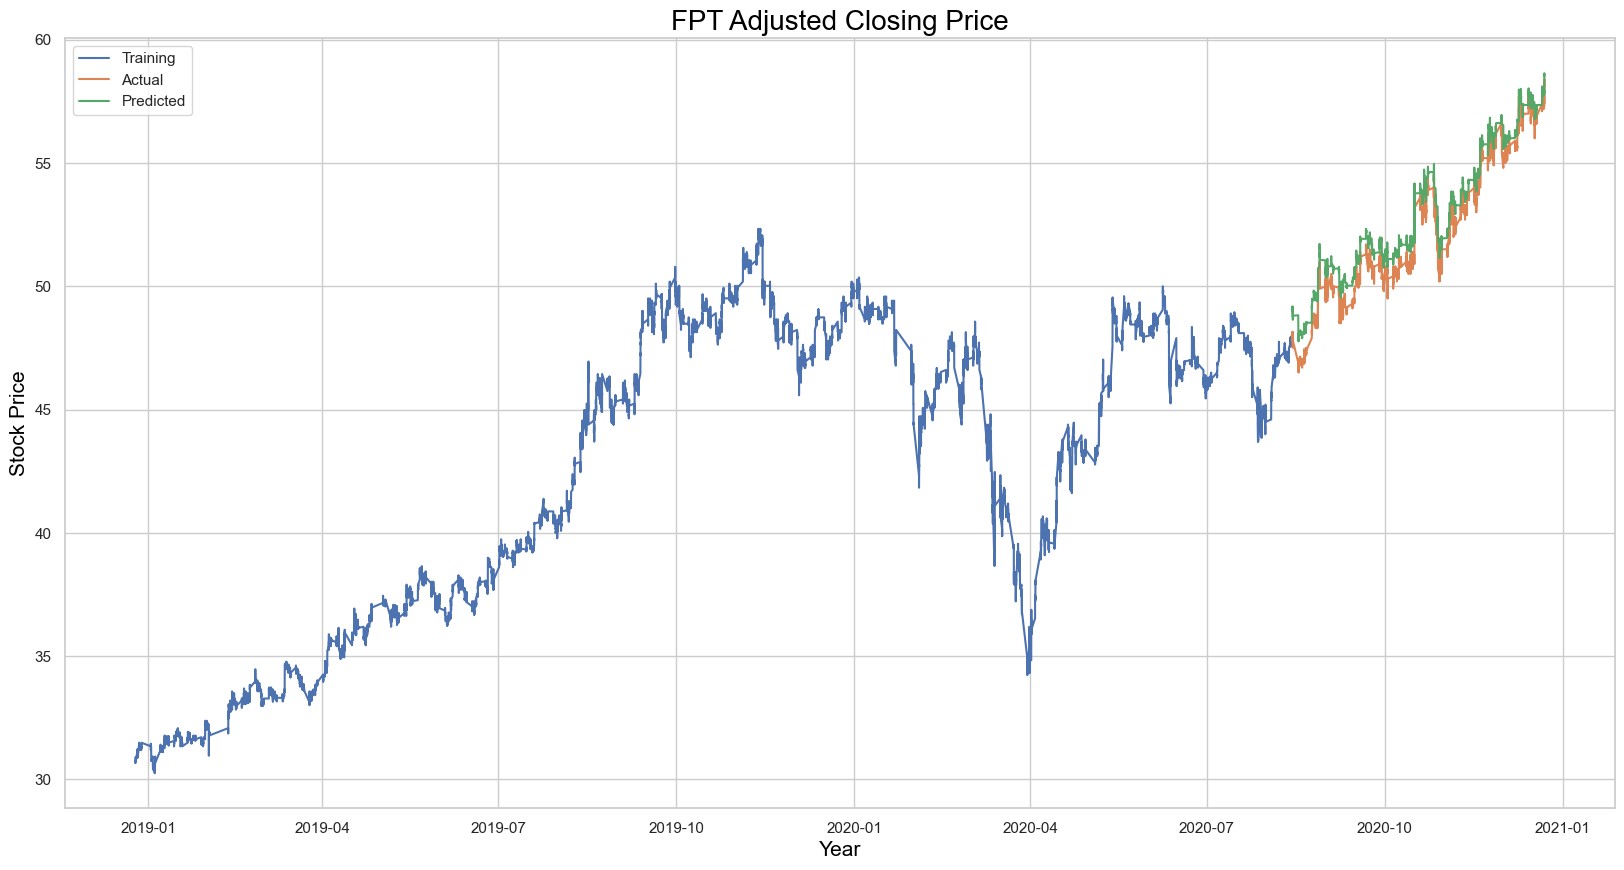

In [718]:
# Plotting predicted and actual
test = fpt_adj[split1:]

pd.set_option('mode.chained_assignment', None)

test.loc[:, 'Predictions'] = adj_closing_price1.copy()

plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
plt.plot(train['Close'], label='Training')
plt.plot(test['Close'], label='Actual')
plt.plot(test['Predictions'], label='Predicted')
plt.title("FPT Adjusted Closing Price", color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Stock Price', color = 'black', fontsize = 15)
plt.legend();

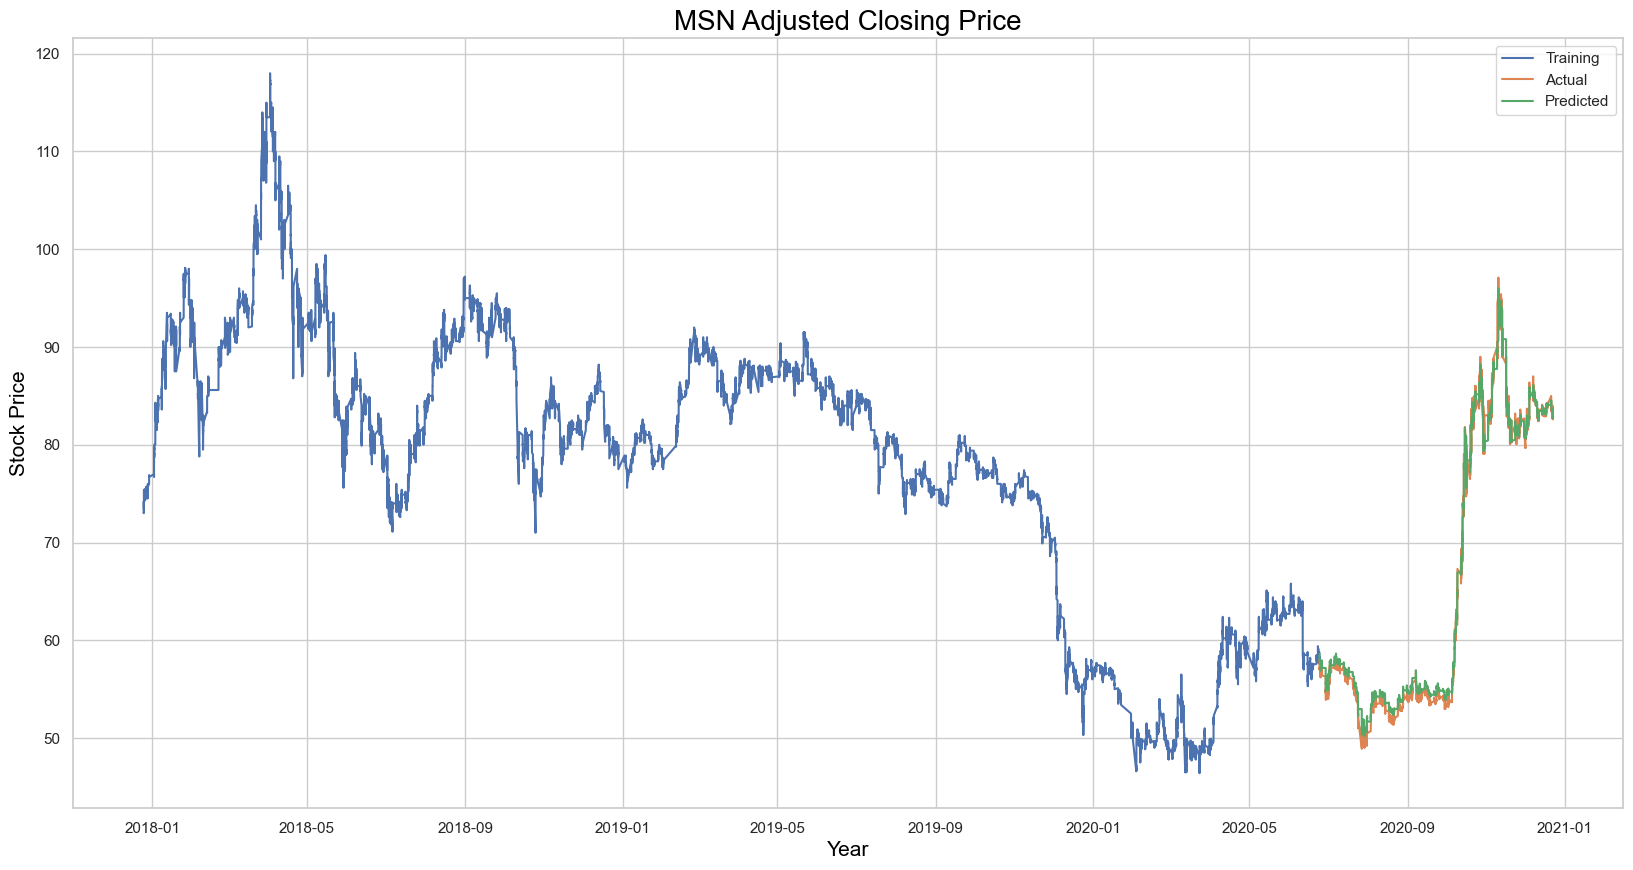

In [717]:
train = msn_adj[:split2]
test = msn_adj[split2:]

pd.set_option('mode.chained_assignment', None)

test.loc[:, 'Predictions'] = adj_closing_price2.copy()

plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
plt.plot(train['Close'], label='Training')
plt.plot(test['Close'], label='Actual')
plt.plot(test['Predictions'], label='Predicted')
plt.title("MSN Adjusted Closing Price", color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Stock Price', color = 'black', fontsize = 15)
plt.legend();

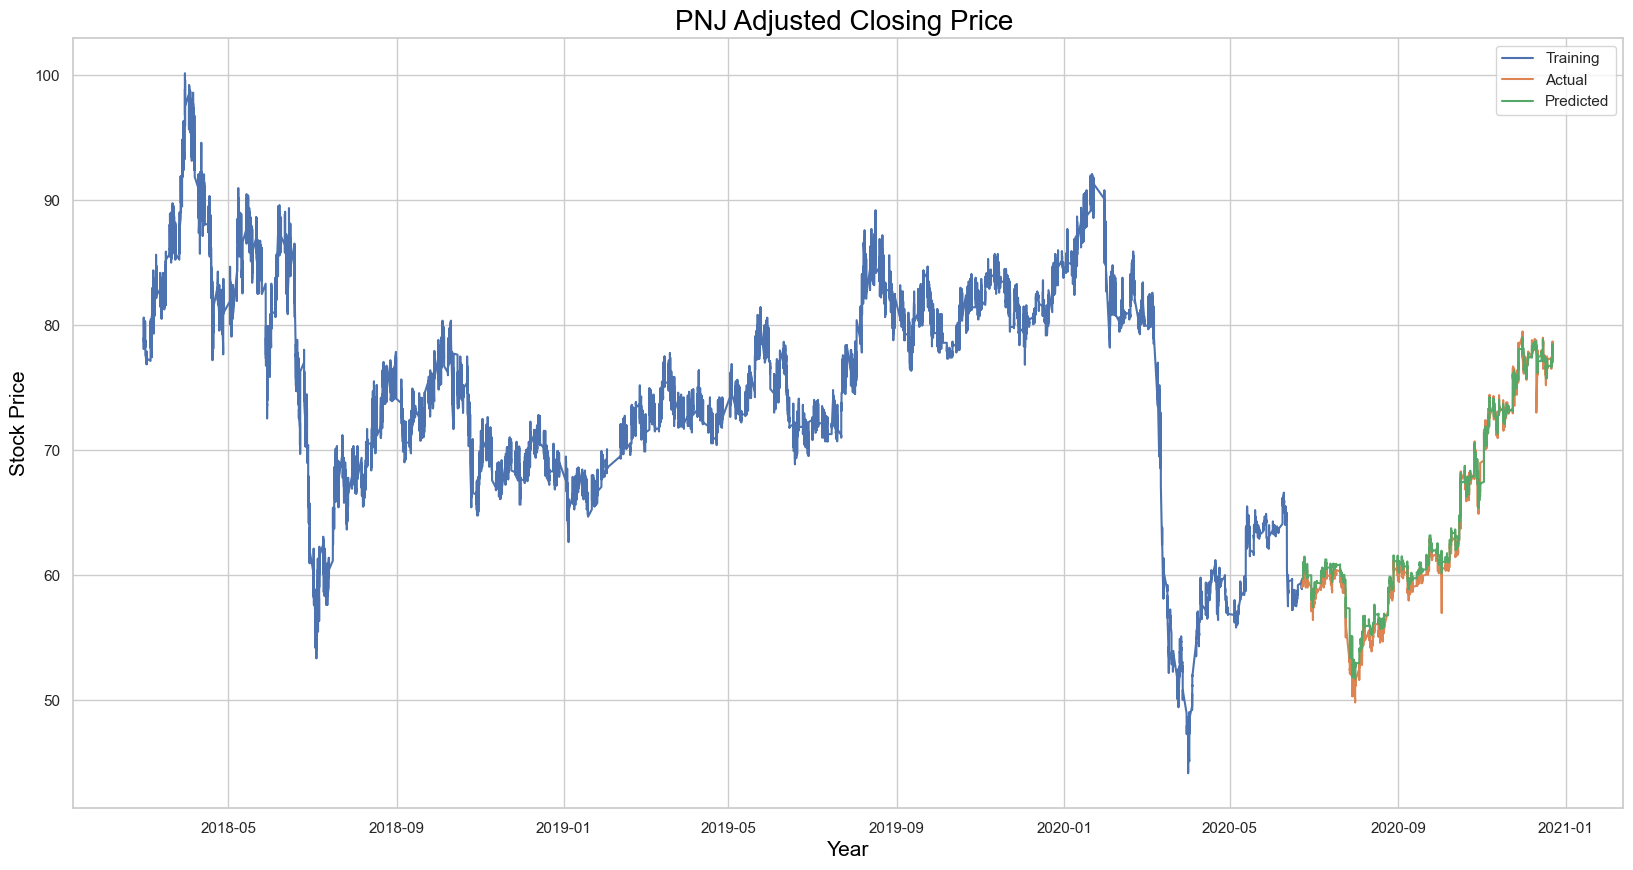

In [716]:
train = pnj_adj[:split3]
test = pnj_adj[split3:]

pd.set_option('mode.chained_assignment', None)

test.loc[:, 'Predictions'] = adj_closing_price3.copy()

plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
plt.plot(train['Close'], label='Training')
plt.plot(test['Close'], label='Actual')
plt.plot(test['Predictions'], label='Predicted')
plt.title("PNJ Adjusted Closing Price ", color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Stock Price', color = 'black', fontsize = 15)
plt.legend();

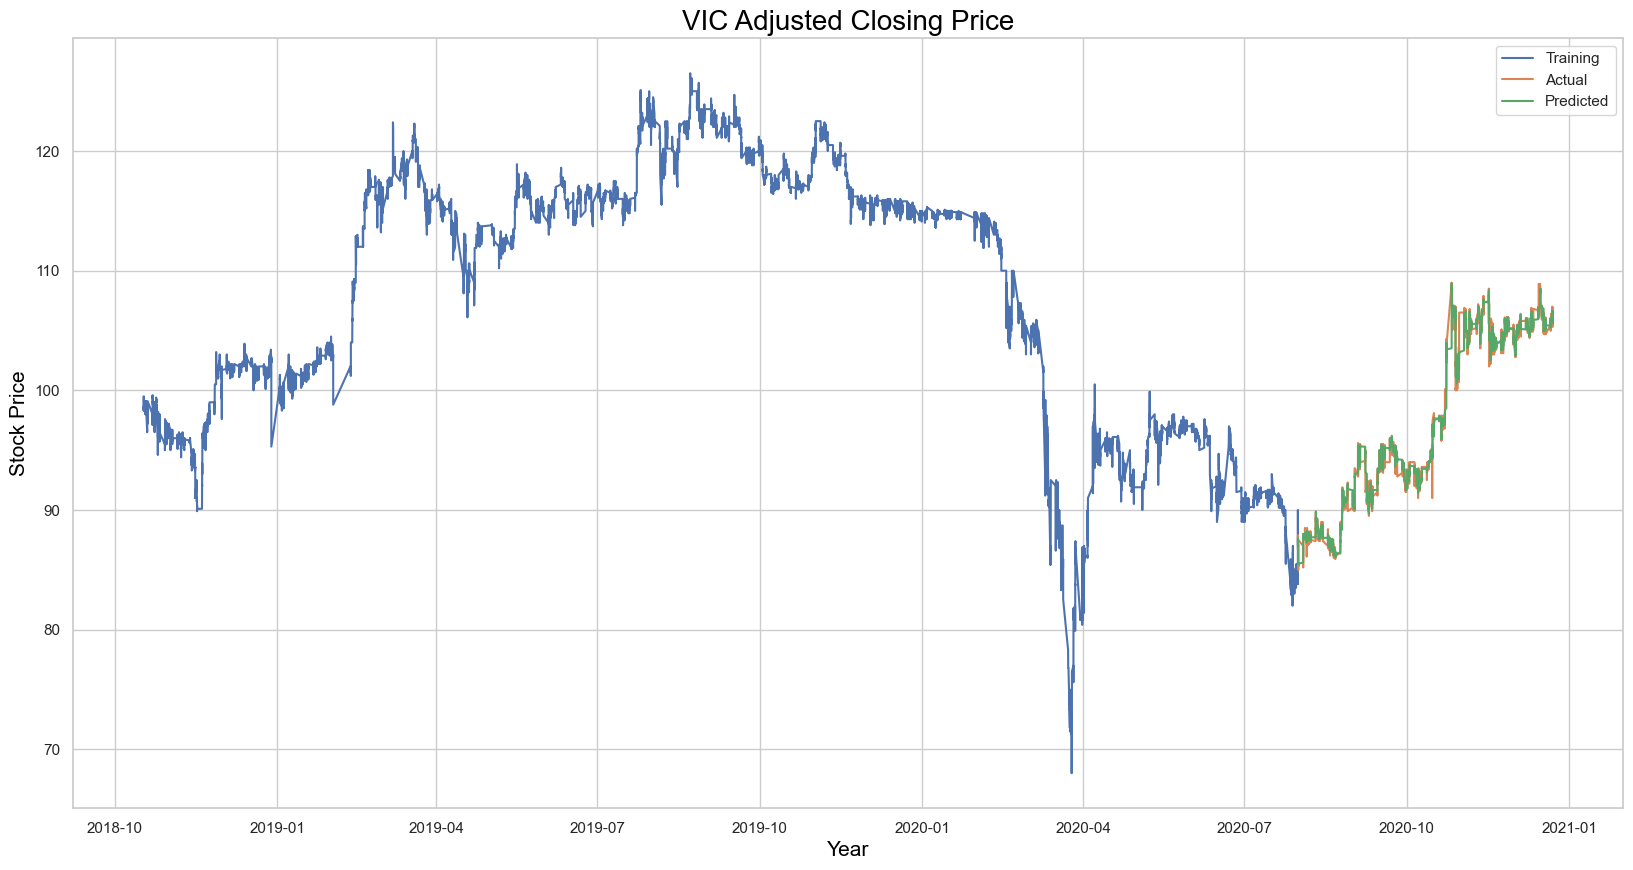

In [715]:
train = vic_adj[:split4]
test = vic_adj[split4:]

pd.set_option('mode.chained_assignment', None)

test.loc[:, 'Predictions'] = adj_closing_price4.copy()

plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
plt.plot(train['Close'], label='Training')
plt.plot(test['Close'], label='Actual')
plt.plot(test['Predictions'], label='Predicted')
plt.title("VIC Adjusted Closing Price", color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Stock Price', color = 'black', fontsize = 15)
plt.legend();